# Hospital Readmissions Data Analysis and Recommendations for Reduction
Audrey Rager

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/audreyrager/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
clean_hospital_read_df.keys()

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

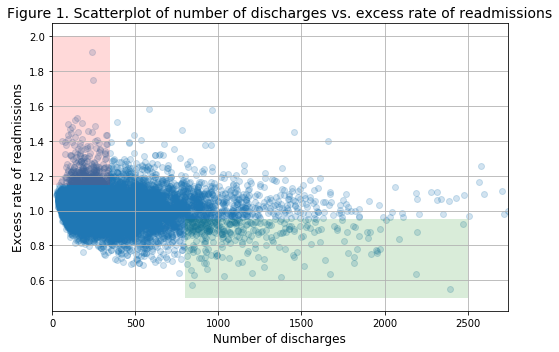

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Figure 1. Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****


<h2>Questions:</h2>

<h3><font>A. Do you agree with the above analysis and recommendations? Why or why not?</font></h3>

<h3>B. Provide support for your arguments and your own recommendations with a statistically sound analysis:</h3>

<ol>
<li>Setup an appropriate hypothesis test.
<li>Compute and report the observed significance value (or p-value).
<li>Report statistical significance for  α  = .01.
<li>Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
<li>Look at the scatterplot above (Figure 1).
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.
</ol>

<h2>My answers...</h2>

<h2><font color="blue">Answer A.</font></h2>

<i>Do you agree with the above analysis and recommendations? Why or why not?</i>


I do not agree with the analysis or recommendations.

Regarding the the initial observations, I do not agree that the plot (Figure 1) shows that the rate of readmissions is trending down overall with an increasing number of discharges.  There are fewer readmittance rates at extremely high discharge rates. But the numbers are few.  These are probably just outliiers and do not represent an overall trend in data.  Most of the data points are concentrated betwee 0.8 and 1.2 readmittance rates and 0 and 1000 discharges. As displayed, there does not appear to be any trend in these data.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

<h2><font color='blue'>Answer B.1.</font></h2>

<i>Setup an appropriate hypothesis test.</i>

H<sub>0</sub>: Hospitals with a higher amount of discharges have the same exessive readmission ratio as hospitals with a smaller amount of discharges 


H<sub>1</sub>: The rate of excessive readmissions ratio is not equal for hospitals.

Test statistic: p-value

Signficance level: α=0.01



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


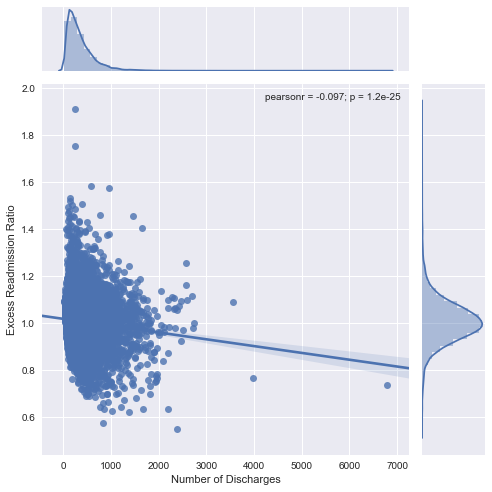

In [13]:
# NaN values in 'Excess Readmission Ratio' column
really_clean_hospital_read_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
really_clean_hospital_read_df.info()

# scatterplot, correlation coefficient, p-value

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=really_clean_hospital_read_df,
              kind='reg', color='b', size=7)
plt.show()

<h2><font color='blue'>Answer B.2.</font></h2>

<i>Compute and report the observed significance value (or p-value).</i>

P-value = 1.2 * 10<sup>-25</sup>.



<h2><font color='blue'>Answer B.3.</font></h2>

<i>Report statistical significance for α = .01.</i>

P-value = 1.2 * 10<sup>-25</sup>.

Since the p-value is less than  𝛼  = .01, we can reject the null hypothesis that hospitals with a higher amount of discharges have the same exessive readmission ratio as hospitals with a smaller amount of discharges.





<h2><font color='blue'>Answer B.4.</font></h2>

<i>Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?</i>

Statistical significance shows the mathematical probability that a relationship between two or more variables exists; practical significance refers to the magnitude of the statistical significance is large enough to care about and  whether a solution is practical. 

In this case, the p-value is very low, so we can reject the null hypothesis.  However, the Peason's-r is a very small negative value, indicating the relationship is not very strong.  Yes, this would change my recommendations to the client.

I would suggest normalizing the data to hospital size (perhaps number of bed) or looking at trends over time.


<h2><font color='blue'>Answer B.5.</font></h2>

<i>Look at the scatterplot above (Figure 1). What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.</i>

The advantage of this plot it gives a quick view of the summary statistics, showing the dispersion and a slight negative trend. The disadvantage comes from the difficulty in interpreting the information. It is difficult to see the difference in the outliers in the excess readmission rate. The shaded areas don't correspond with any typical summary statistic. 

The new plot (below) shows the data with a slightly negative trendline, making this relationship a bit easier to see.  But it also shows the tremendous amount of variation in readmission rates at lower discharge numbers and the outliers at high discharge numbers.  The Pearsons-r value is a small, negative number, indicating that there is a slightly negative correlation. But becuase the Peason's-r is so far from 1, the relationship is not very strong. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/audreyrager/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


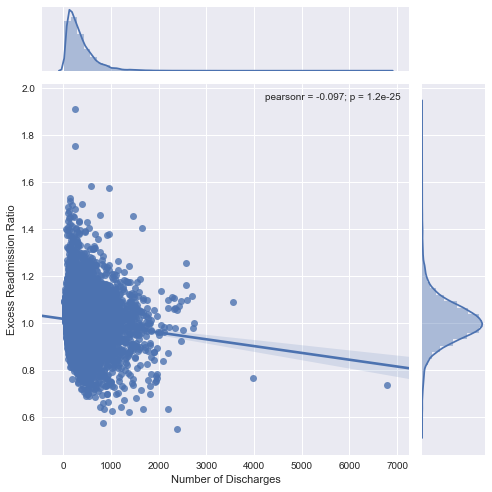

In [14]:

# NaN values in 'Excess Readmission Ratio' column
really_clean_hospital_read_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
really_clean_hospital_read_df.info()

# scatterplot, correlation coefficient, p-value

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=really_clean_hospital_read_df,
              kind='reg', color='b', size=7)
plt.show()